# Import Libraries

In [1]:
import numpy as np
import cv2
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout,SpatialDropout2D
from keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt

## Dataset Input

In [2]:
dir_path = 'C:/Users/litgr/OneDrive/Documents/Final_Project/AWS/AWS_Dataset/train'

In [3]:
img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [4]:
len(img_list)

4673

# Image Augmentation

In [5]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

train_generator=train.flow_from_directory(dir_path,
                                          target_size=(300,300),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(300,300),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 4253 images belonging to 4 classes.
Found 470 images belonging to 4 classes.
{'Metal': 0, 'Organic_Waste': 1, 'Paper': 2, 'Plastics': 3}
{0: 'Metal', 1: 'Organic_Waste', 2: 'Paper', 3: 'Plastics'}


In [6]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32, 4))

### Writing the labels file

In [7]:
print (train_generator.class_indices)

Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(Labels)


{'Metal': 0, 'Organic_Waste': 1, 'Paper': 2, 'Plastics': 3}


# Building CNN & Saving keras model

In [8]:
model=Sequential()
#Convolution blocks

model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(SpatialDropout2D(0.5)) # No accuracy

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
#model.add(SpatialDropout2D(0.5))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#Classification layers
model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(SpatialDropout2D(0.5))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

filepath="trained_model.keras"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]



c:\Users\litgr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Reference: [Callback model Checkpoint](https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/)

# Summarizing our model

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,803,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,844 (10.85 MB)

 Trainable params: 2,843,844 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling Model using categorical cross entropy loss function & Adam Optimizer

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

#es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)


# Let's Train

In [11]:
history = model.fit(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              callbacks=callbacks_list)


Epoch 1/100


c:\Users\litgr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.3509 - loss: 1.3496
Epoch 1: val_acc improved from -inf to 0.39732, saving model to trained_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - acc: 0.3515 - loss: 1.3484 - val_acc: 0.3973 - val_loss: 1.2006
Epoch 2/100
62/71 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - acc: 0.4560 - loss: 1.1857

c:\Users\litgr\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_acc improved from 0.39732 to 0.54464, saving model to trained_model.keras
71/71 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - acc: 0.4556 - loss: 1.1834 - val_acc: 0.5446 - val_loss: 1.1156
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - acc: 0.4956 - loss: 1.1152
Epoch 3: val_acc did not improve from 0.54464
71/71 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - acc: 0.4957 - loss: 1.1151 - val_acc: 0.5000 - val_loss: 0.5242
Epoch 4/100
62/71 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - acc: 0.5137 - loss: 1.0760
Epoch 4: val_acc did not improve from 0.54464
71/71 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - acc: 0.5163 - loss: 1.0715 - val_acc: 0.4375 - val_loss: 1.1288
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - acc: 0.5424 - loss: 1.0370
Epoch 5: val_acc did not improve from 0.54464
71/71 ━━━━━━━━━━━━━━━━━━━━ 295s 4s/step - acc: 0.5422 - loss: 1.0373 - val_acc: 0.5223 - val_loss: 1.0404
Epoch 6/100
62/71 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - acc: 0.4805 - loss: 1.0778
Epoch 6: val_acc did not improve

# Testing PREDICTION
##### Note: Path is of training dataset (pl. don't mind)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Maximum Probability:  0.66074294
Classified: Paper


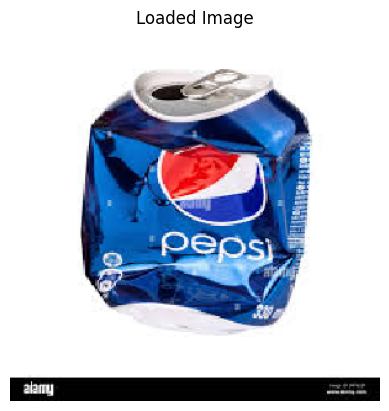

In [12]:
from keras.preprocessing import image
import numpy as np
img_path = 'pepsi.png'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)




-------------------Individual Probability--------------------------------

METAL : 16.87 %
ORGANIC_WASTE : 0.0 %
PAPER : 66.07 %
PLASTICS : 17.05 %


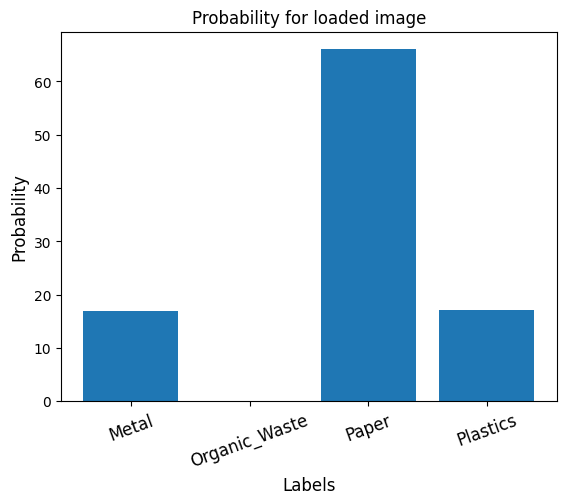

In [13]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()

# Accuracy Graph

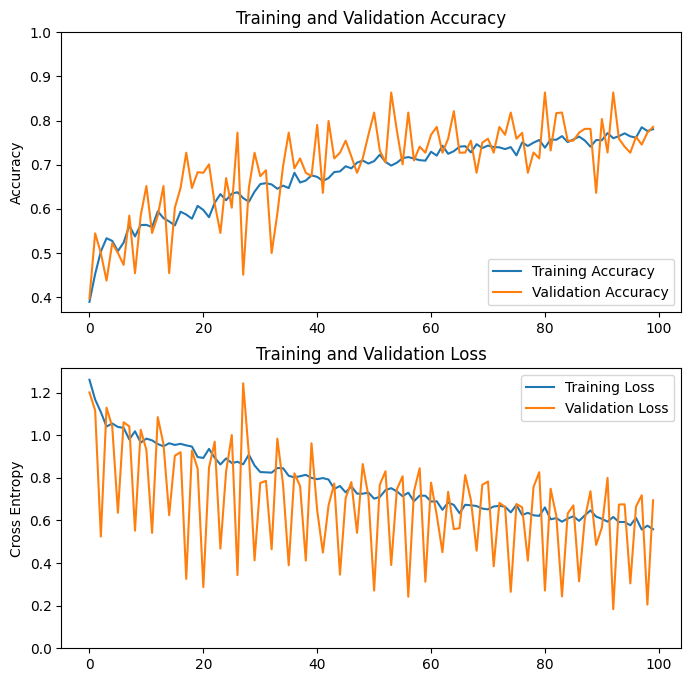

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

## Converting to TFLite
#### Note: Image Size is 300

In [15]:
from tensorflow.keras.models import load_model

# Save the Keras model
file = "AWS_CNN.h5"
model.save(file)

# Load the model
model = load_model(file)
